In [0]:
%tensorflow_version 2.x
import pathlib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from matplotlib import pyplot as plt
tf.version.VERSION

'2.2.0-rc1'

In [0]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

228818944/228813984 [==============================] - 6s 0us/step


PosixPath('/root/.keras/datasets/flower_photos')

In [0]:
CLASSES = dict(daisy="0", dandelion="1", roses="2", sunflowers="3", tulips="4")
print(CLASSES)

{'daisy': '0', 'dandelion': '1', 'roses': '2', 'sunflowers': '3', 'tulips': '4'}


In [0]:
daisies = data_dir/"daisy"
daisy = load_img(next(daisies.iterdir()))

In [0]:
daisy_arr = np.array(daisy)

In [0]:
daisy_arr.shape # height x width x channels

(233, 320, 3)

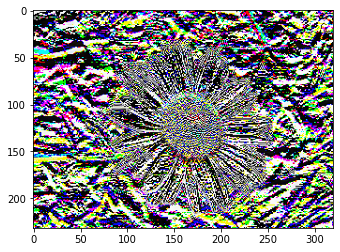

In [0]:
x = np.diff(daisy, axis=0)
plt.imshow(x)

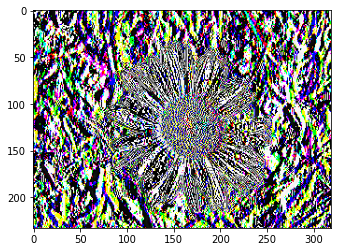

In [0]:
x = np.diff(daisy, axis=1)
plt.imshow(x)

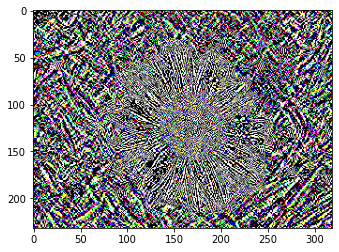

In [0]:
x = np.diff(np.diff(daisy, axis=0), axis=1)
plt.imshow(x)

In [0]:
C = Conv2D(1, (5, 4), input_shape=(233, 320, 3), use_bias=False)
# 1 = # of filters
# 3 = dimension of each filter (3 x 3)
# input_shape = height x width x channels
# (m, n, channels) = (233, 320, e); (k, l) = (3, 4)

In [0]:
CC = C(np.expand_dims(daisy_arr/255., 0).astype(np.float32)) # batch of 1 image;  (# images) x height x width x channels
[w] = C.get_weights()
w = w.squeeze()
w.shape

(5, 4, 3)

In [0]:
Z = daisy_arr[1:6, 1:5, :]
CC[0,1,1,0], np.sum(w*Z)/255.

(<tf.Tensor: shape=(), dtype=float32, numpy=0.19876188>, 0.19876189886354934)

In [0]:
G = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1]).reshape(3, 3)/16.
G

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [0]:
C = Sequential([Conv2D(1, 3, activation="linear", input_shape=(233, 320, 3), use_bias=False)])
wts = C.get_weights()

In [0]:
C.set_weights([np.expand_dims(GGG, axis=3)])

In [0]:
CCC = C(np.expand_dims(daisy_arr/255., 0).astype(np.float32))

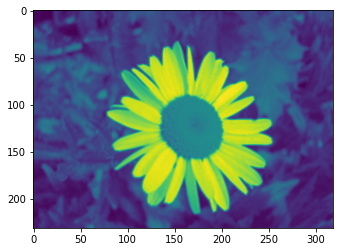

In [0]:
plt.imshow(tf.squeeze(CCC))

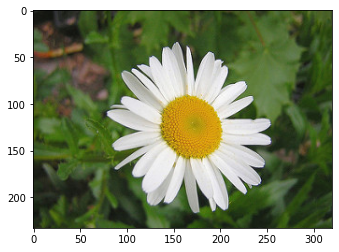

In [0]:
plt.imshow(daisy_arr)

In [0]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1))) # zero-padding
model.add(MaxPooling2D(2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

X_tr = (X_tr/255.).astype(np.float32)
Y_tr = np.zeros((60000, 10)).astype(np.float32)
Y_tr[np.arange(60000), y_tr] = 1

X_te = (X_te/255.).astype(np.float32)
Y_te = np.zeros((10000, 10)).astype(np.float32)
Y_te[np.arange(10000), y_te] = 1

CLASSES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_tr = np.expand_dims(X_tr, axis=3)
X_te = np.expand_dims(X_te, axis=3)
print(X_tr.shape, X_te.shape, Y_tr.shape, Y_te.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_te, Y_te))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 319us/sample - loss: 1.3440 - accuracy: 0.5057 - val_loss: 0.6874 - val_accuracy: 0.7400
Epoch 2/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.7724 - accuracy: 0.7179 - val_loss: 0.5647 - val_accuracy: 0.7800
Epoch 3/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.6366 - accuracy: 0.7674 - val_loss: 0.5050 - val_accuracy: 0.8110
Epoch 4/10
60000/60000 [==============================] - 19s 309us/sample - loss: 0.5638 - accuracy: 0.7987 - val_loss: 0.4451 - val_accuracy: 0.8366
Epoch 5/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.5214 - accuracy: 0.8166 - val_loss: 0.4176 - val_accuracy: 0.8450
Epoch 6/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.4846 - accuracy: 0.8312 - val_loss: 0.4034 - val_accuracy: 0.8507
Epoch 7/10
60000/60000 [====================

In [0]:
model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_te, Y_te))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.3855 - accuracy: 0.8668 - val_loss: 0.3350 - val_accuracy: 0.8730
Epoch 2/10
60000/60000 [==============================] - 18s 306us/sample - loss: 0.3713 - accuracy: 0.8705 - val_loss: 0.3269 - val_accuracy: 0.8811
Epoch 3/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.3622 - accuracy: 0.8735 - val_loss: 0.3216 - val_accuracy: 0.8829
Epoch 4/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3510 - accuracy: 0.8782 - val_loss: 0.3398 - val_accuracy: 0.8784
Epoch 5/10
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3408 - accuracy: 0.8817 - val_loss: 0.3149 - val_accuracy: 0.8845
Epoch 6/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.3308 - accuracy: 0.8854 - val_loss: 0.3014 - val_accuracy: 0.8899
Epoch 7/10
60000/60000 [====================

In [0]:
model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_te, Y_te))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2917 - accuracy: 0.8976 - val_loss: 0.2903 - val_accuracy: 0.8959
Epoch 2/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2856 - accuracy: 0.9014 - val_loss: 0.2889 - val_accuracy: 0.8961
Epoch 3/10
60000/60000 [==============================] - 18s 301us/sample - loss: 0.2793 - accuracy: 0.9036 - val_loss: 0.2766 - val_accuracy: 0.8987
Epoch 4/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.2714 - accuracy: 0.9061 - val_loss: 0.2844 - val_accuracy: 0.9008
Epoch 5/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.2633 - accuracy: 0.9081 - val_loss: 0.2785 - val_accuracy: 0.8995
Epoch 6/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.2601 - accuracy: 0.9099 - val_loss: 0.2775 - val_accuracy: 0.9042
Epoch 7/10
60000/60000 [====================